<a href="https://colab.research.google.com/github/bruno-albino/exploratory-analysis-ifsp/blob/main/Analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Top 8800 Twitch Streamers**
### Top of the best streams based on watch time.

###### Nome: Bruno da Silva Albino CP: 300273X
###### Nome: Eduardo Bueno CP: 300273X
---


Disciplina: Inteligência Artificial

Professor: Samuel Martins


---



In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# estilos padrão para os plots/visualizações
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### **1. Dataset**
----
Dataset: Top 8800 Twitch Streamers: https://www.kaggle.com/girlazo/top-8800-twitch-*streamers*

Este dataset possui 8800 linhas, listando os melhores streamers do mundo na plataforma de stream Twitch, baseado em tempo assistido pelos usuários. Cada registro possui o nome do streamer, a quantidaded de vies e assinantes do canal, e outras informações como os três jogos mais jogados de cada streamer




#### **1.1 Importando o Dataset**

In [93]:
data = pd.read_csv('/content/drive/MyDrive/TwitchDataSet.csv')

In [94]:
data.head()

,profile picture,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,partnered,mature,language,completa name,first category,second category,third category
0,https://static-cdn.jtvnw.net/jtv_user_pictures...,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,True,False,English,xQcOW,Just Chatting,Among Us,Overwatch
1,https://static-cdn.jtvnw.net/jtv_user_pictures...,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,True,Portuguese,Gaules,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,https://static-cdn.jtvnw.net/jtv_user_pictures...,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,True,False,English,summit1g,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,https://static-cdn.jtvnw.net/jtv_user_pictures...,4,ESL_CSGO,4764929775,517965,300575,9249,4195657,870484,126008641,True,False,English,ESL_CSGO,Counter-Strike: Global Offensive,NaN,NaN
4,https://static-cdn.jtvnw.net/jtv_user_pictures...,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,True,False,English,NICKMERCS,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection


#### **1.2 Informações básicas**

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   profile picture   8800 non-null   object
 1   top count         8800 non-null   int64 
 2   screen name       8800 non-null   object
 3   watch time        8800 non-null   int64 
 4   stream time       8800 non-null   int64 
 5   peak viewers      8800 non-null   int64 
 6   average viewers   8800 non-null   int64 
 7   followers         8800 non-null   int64 
 8   followers gained  8800 non-null   int64 
 9   views gained      8800 non-null   int64 
 10  partnered         8800 non-null   bool  
 11  mature            8800 non-null   bool  
 12  language          8799 non-null   object
 13  completa name     8800 non-null   object
 14  first category    8795 non-null   object
 15  second category   8390 non-null   object
 16  third category    8009 non-null   object
dtypes: bool(2), in

In [96]:
print(f'O dataset possui {data.shape[0]} registros/observações/linhas e {data.shape[1]} atributos/variáveis/colunas. Alguns atributos possuem atributos null (p. ex., "language") que precisará ser tratado, mas todos já possuem os tipos corretos')

O dataset possui 8800 registros/observações/linhas e 17 atributos/variáveis/colunas. Alguns atributos possuem atributos null (p. ex., "language") que precisará ser tratado, mas todos já possuem os tipos corretos


### **2. Limpeza e Pré-processamento de Dados**
---

In [91]:
df = data.copy()

In [97]:
df.head()

,profile picture,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,partnered,mature,language,completa name,first category,second category,third category
0,https://static-cdn.jtvnw.net/jtv_user_pictures...,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,True,False,English,xQcOW,Just Chatting,Among Us,Overwatch
1,https://static-cdn.jtvnw.net/jtv_user_pictures...,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,True,Portuguese,Gaules,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,https://static-cdn.jtvnw.net/jtv_user_pictures...,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,True,False,English,summit1g,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,https://static-cdn.jtvnw.net/jtv_user_pictures...,4,ESL_CSGO,4764929775,517965,300575,9249,4195657,870484,126008641,True,False,English,ESL_CSGO,Counter-Strike: Global Offensive,NaN,NaN
4,https://static-cdn.jtvnw.net/jtv_user_pictures...,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,True,False,English,NICKMERCS,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection


#### **2.1 Removendo colunas não utilizadas**
O dataset possui colunas como a foto e o nome utilizada pelo streamer, o que para a nossa análise não vamos precisar

In [98]:
df = df.drop(columns=['profile picture', 'partnered', 'completa name'])

In [99]:
df.head()

,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,False,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,False,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,4,ESL_CSGO,4764929775,517965,300575,9249,4195657,870484,126008641,False,English,Counter-Strike: Global Offensive,NaN,NaN
4,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,False,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection


#### **2.2 watch time**
Já que este é o dado que elege a posição do streamer, vamos checar se está de acordo

In [100]:
df['watch time'].isnull().sum()

0

In [101]:
max_watch_time = df['watch time'].max()
min_watch_time = df['watch time'].min()

In [102]:
max_place = df[df['watch time'] == max_watch_time]
max_place

,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,False,English,Just Chatting,Among Us,Overwatch


In [103]:
min_place = df[df['watch time'] == min_watch_time]
min_place

,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
8799,8800,dhary_xd,8827995,165105,2270,50,9194,2921,927197,False,English,Music,PLAYERUNKNOWN,Destiny 2


Como podemos ver, não temos valores nulos e as posições dos streamers estão de acordo com as horas assistidas

#### **2.3 stream time**

Vamos checar se existem *outliers* nesta coluna

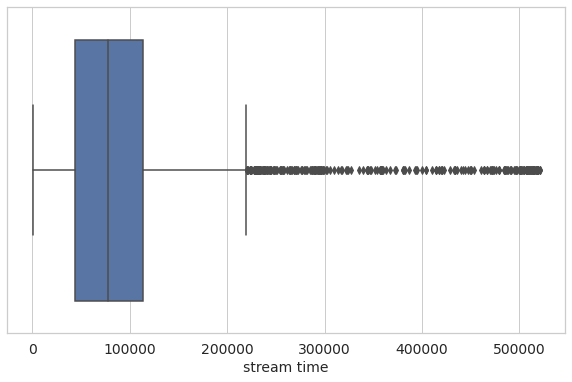

In [104]:
sns.boxplot(x='stream time', data=df)

In [105]:
df['stream time'].isnull().sum()

0

Não temos valores nulos e os outliers são aceitáveis

#### **2.4 mature**
Verificar se existe somente valores booleanos

In [106]:
df['mature'].unique()

array([False,  True])

#### **2.5 Language**
Este é um dos campos que possuem nulos, vamos analisar

In [107]:
df['language'].unique()

array(['English', 'Portuguese', 'Spanish', 'Korean', 'German', 'Russian',
       'French', 'Japanese', 'Turkish', 'Chinese', 'Czech', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Greek',
       'Hungarian', 'Finnish', 'Swedish', 'Romanian', 'Danish',
       'Chinese (Hong Kong SAR)', 'Dutch', 'Bulgarian', 'Norwegian',
       'Hindi', nan, 'Ukrainian', 'Indonesian'], dtype=object)

In [108]:
df['language'].isnull().sum()

1

In [109]:
df[df['language'].isnull()]

,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
4397,4398,pech_gaming,22255725,55965,1215,400,24339,11879,242417,True,NaN,Grand Theft Auto V,Rust,Escape From Tarkov


Como esta é uma coluna muito importante para a nossa análise, iremos remover esta entrada nula

In [110]:
df.dropna(subset=['language'], inplace=True)

In [111]:
df['language'].isnull().sum()

0

#### **2.6 Second category**
Vemos que esta coluna possui bastante valores nulos, vamos checar

In [112]:
df['second category'].isnull().sum()

410

In [113]:
second_category_null = df['second category'].isnull()
df[second_category_null]

,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
3,4,ESL_CSGO,4764929775,517965,300575,9249,4195657,870484,126008641,False,English,Counter-Strike: Global Offensive,NaN,NaN
18,19,LCK_Korea,2271646785,49470,208341,45406,724511,294841,86113714,False,Korean,League of Legends,NaN,NaN
24,25,LEC,1912132740,57570,388794,28581,1107511,678235,33667372,False,English,League of Legends,NaN,NaN
27,28,csgomc_ru,1868846880,110205,364816,17276,608917,568052,61473607,False,Russian,Counter-Strike: Global Offensive,NaN,NaN
28,29,LCS,1852648845,36630,241509,48240,1257562,584326,34436876,False,English,League of Legends,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,8694,FC_DYNAMO,9085365,108990,345,81,20841,3565,378818,False,Russian,World of Tanks,NaN,NaN
8695,8696,LigaPro8,9082995,131565,485,64,876,862,907384,False,English,NBA 2K20,NaN,NaN
8696,8697,yDiamondd,9078390,14805,3090,604,100072,89856,320627,False,Portuguese,Fortnite,NaN,NaN
8733,8734,partypokerRU,8912745,31905,2022,220,11982,4166,271026,True,Russian,Poker,NaN,NaN


Vemos que temos 410 registros com valores nulos como segunda categoria. Entretando, conseguimos perceber que estes registros também não possuem a terceira categoria. Vamos confirmar

In [114]:
third_category_null = df['third category'].isnull()
df[third_category_null & second_category_null]

,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
3,4,ESL_CSGO,4764929775,517965,300575,9249,4195657,870484,126008641,False,English,Counter-Strike: Global Offensive,NaN,NaN
18,19,LCK_Korea,2271646785,49470,208341,45406,724511,294841,86113714,False,Korean,League of Legends,NaN,NaN
24,25,LEC,1912132740,57570,388794,28581,1107511,678235,33667372,False,English,League of Legends,NaN,NaN
27,28,csgomc_ru,1868846880,110205,364816,17276,608917,568052,61473607,False,Russian,Counter-Strike: Global Offensive,NaN,NaN
28,29,LCS,1852648845,36630,241509,48240,1257562,584326,34436876,False,English,League of Legends,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,8694,FC_DYNAMO,9085365,108990,345,81,20841,3565,378818,False,Russian,World of Tanks,NaN,NaN
8695,8696,LigaPro8,9082995,131565,485,64,876,862,907384,False,English,NBA 2K20,NaN,NaN
8696,8697,yDiamondd,9078390,14805,3090,604,100072,89856,320627,False,Portuguese,Fortnite,NaN,NaN
8733,8734,partypokerRU,8912745,31905,2022,220,11982,4166,271026,True,Russian,Poker,NaN,NaN


Já que estes registros possuem valores NaN nas colunas de segundo e terceiro colocado, iremos removê-los

In [115]:
df.dropna(subset=['second category'], inplace=True)

In [116]:
df['second category'].isnull().sum()

0

#### **2.7 Third category**

In [117]:
 df['third category'].isnull().sum()

381

In [118]:
df[df['third category'].isnull()]

,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
35,36,OgamingLoL,1696248240,495930,204491,3455,556640,128514,73896080,False,French,League of Legends,Teamfight Tactics,NaN
54,55,RiotGamesBrazil,1343793615,38145,255542,29278,1079746,347030,32291480,False,Portuguese,League of Legends,Teamfight Tactics,NaN
67,68,LVPes,1238580630,92250,233009,14637,656489,186991,55915235,False,Spanish,League of Legends,Teamfight Tactics,NaN
104,105,LPL,899691960,48060,146577,18738,537728,301490,33202930,False,English,League of Legends,Teamfight Tactics,NaN
120,121,allkeyshop_tv,757691745,486105,6075,1550,69689,28879,55118276,False,English,Just Chatting,Fortnite,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,8609,asiafm923,9196035,442215,92,20,573,226,106501,False,Chinese,Music,Unlisted on Twitch,NaN
8654,8655,JoystickOW,9139860,123900,3286,65,21964,18944,164689,False,English,Overwatch,Apex Legends,NaN
8704,8705,Aleeksi,8952300,3870,4093,2303,74173,25784,351632,True,Finnish,Counter-Strike: Global Offensive,Counter-Strike,NaN
8711,8712,PokerStaples247,8944605,519000,567,16,11712,4164,194215,False,English,Poker,Unlisted on Twitch,NaN


Como agora temos menos valores NaN somente para o terceiro colocado, ao invés de removê-los podemos inserir um texto padrão como "Não informado"

In [119]:
df['third category'].fillna("Não informado", inplace=True)

In [120]:
 df['third category'].isnull().sum()

0

#### **2.8 Removendo duplicados e Correções finais**
Vamos remover os registros duplicados, caso haja algum

In [121]:
df[df.duplicated(keep='first')]

,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category


In [122]:
df.reset_index(drop=True, inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8389 entries, 0 to 8388
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   top count         8389 non-null   int64 
 1   screen name       8389 non-null   object
 2   watch time        8389 non-null   int64 
 3   stream time       8389 non-null   int64 
 4   peak viewers      8389 non-null   int64 
 5   average viewers   8389 non-null   int64 
 6   followers         8389 non-null   int64 
 7   followers gained  8389 non-null   int64 
 8   views gained      8389 non-null   int64 
 9   mature            8389 non-null   bool  
 10  language          8389 non-null   object
 11  first category    8389 non-null   object
 12  second category   8389 non-null   object
 13  third category    8389 non-null   object
dtypes: bool(1), int64(8), object(5)
memory usage: 860.3+ KB


In [124]:
df.head()

,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,mature,language,first category,second category,third category
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,False,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,False,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,False,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,False,English,VALORANT,The Elder Scrolls Online,Genshin Impact


#### **2.9 Renomeando Colunas**

In [125]:
df = df.rename(columns={
    'top count': 'topCount',
    'watch time': 'watchTime',
    'stream time': 'streamTime',
    'peak viewers': 'peakViewers',
    'average viewers': 'averageViewers',
    'followers gained': 'followersGained',
    'views gained': 'viewsGained',
    'first category': 'firstCategory',
    'second category': 'secondCategory',
    'third category': 'thirdCategory',
    'screen name': 'screenName'
})

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8389 entries, 0 to 8388
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   topCount         8389 non-null   int64 
 1   screenName       8389 non-null   object
 2   watchTime        8389 non-null   int64 
 3   streamTime       8389 non-null   int64 
 4   peakViewers      8389 non-null   int64 
 5   averageViewers   8389 non-null   int64 
 6   followers        8389 non-null   int64 
 7   followersGained  8389 non-null   int64 
 8   viewsGained      8389 non-null   int64 
 9   mature           8389 non-null   bool  
 10  language         8389 non-null   object
 11  firstCategory    8389 non-null   object
 12  secondCategory   8389 non-null   object
 13  thirdCategory    8389 non-null   object
dtypes: bool(1), int64(8), object(5)
memory usage: 860.3+ KB


### **3. Análise Exploratória**

In [127]:
df.head()

,topCount,screenName,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained,mature,language,firstCategory,secondCategory,thirdCategory
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,False,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,False,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,False,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,False,English,VALORANT,The Elder Scrolls Online,Genshin Impact


#### **3.1 Estatísticas descritivas básicas**

In [128]:
df.describe()

,topCount,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained
count,8389.000000,8.389000e+03,8389.000000,8.389000e+03,8389.000000,8.389000e+03,8.389000e+03,8.389000e+03
mean,4394.242937,7.659037e+07,87237.875790,9.303674e+03,1099.863273,1.451444e+05,6.073100e+04,2.473236e+06
std,2536.447503,2.376042e+08,64151.708113,2.553945e+04,2893.573996,3.959783e+05,1.636855e+05,9.633958e+06
min,1.000000,8.827995e+06,150.000000,7.500000e+01,16.000000,1.190000e+02,-1.785700e+05,1.982000e+03
25%,2202.000000,1.307338e+07,45570.000000,1.550000e+03,174.000000,2.327300e+04,7.692000e+03,3.619410e+05
50%,4388.000000,2.230203e+07,78450.000000,3.423000e+03,351.000000,5.333300e+04,1.951300e+04,7.697760e+05
75%,6585.000000,5.232114e+07,114345.000000,8.212000e+03,894.000000,1.327820e+05,5.346700e+04,2.103522e+06
max,8800.000000,7.333609e+09,521115.000000,1.016962e+06,89278.000000,1.604258e+07,4.681567e+06,6.848357e+08


#### **3.2 Quais são os 10 maiores streamers do mundo (tempo assistido) ?**

Para analisar quais são os 10 melhores streamers por tempo assitido, ordenaremos os registros pela coluna "watchTime" e buscamos os 10 primeiros registros.


In [129]:
top10_streamers_tempo_assitido = df.sort_values(by='watchTime', ascending=False).head(10)
top10_streamers_tempo_assitido

,topCount,screenName,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained,mature,language,firstCategory,secondCategory,thirdCategory
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,False,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,False,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,False,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,False,English,VALORANT,The Elder Scrolls Online,Genshin Impact
5,7,loltyler1,3503191680,131115,105499,25985,3719080,1066209,59364698,False,English,League of Legends,The Last of Us Part II,Halo: The Master Chief Collection
6,8,Rubius,3278317200,63285,240096,49771,6579492,4309441,74460362,False,Spanish,Minecraft,Just Chatting,Grand Theft Auto V
7,9,Tfue,3276339360,130680,190173,25269,9184421,2023733,70427346,False,English,Fortnite,Call Of Duty: Modern Warfare,Among Us
8,10,auronplay,3268219170,47385,191742,64477,5053692,4681567,57146179,False,Spanish,Grand Theft Auto V,Minecraft,Among Us
9,11,TimTheTatman,3183232095,106455,335403,29316,5639554,1550318,53274797,True,English,Call Of Duty: Modern Warfare,Just Chatting,Fortnite


Text(0, 0.5, 'Streamer')

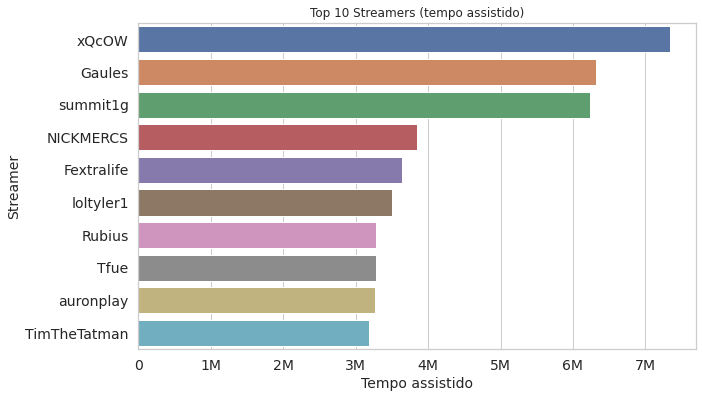

In [139]:
sns.barplot(data=top10_streamers_tempo_assitido, x='watchTime', y='screenName')

plt.xticks([0, 1e9, 2e9, 3e9, 4e9, 5e9, 6e9, 7e9], ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M'])
plt.title('Top 10 Streamers (tempo assistido)')
plt.xlabel('Tempo assistido')
plt.ylabel('Streamer')

#### **3.3 Quais são os 10 maiores streamers do mundo (views) ?**

Para analisar quais são os 10 melhores streamers por tempo assitido, ordenaremos os registros pela coluna "averageViewers" e buscamos os 10 primeiros registros.

In [ ]:
top10_streamers_views = df.sort_values(by='averageViewers', ascending=False).head(10)
top10_streamers_views

Text(0, 0.5, 'Streamer')

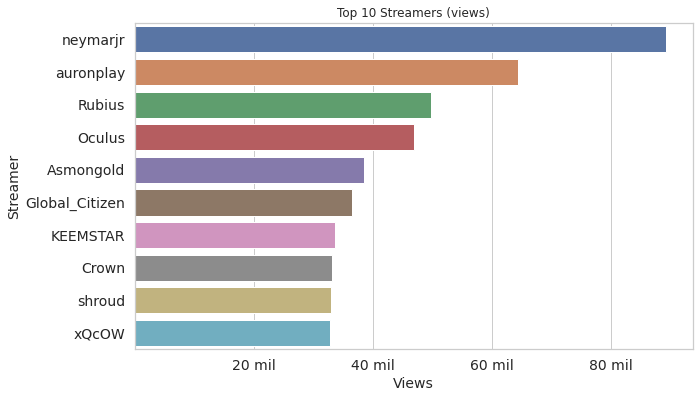

In [183]:
sns.barplot(data=top10_streamers_views, x='averageViewers', y='screenName')

plt.xticks([20000, 40000, 60000, 80000], ['20 mil', '40 mil', '60 mil', '80 mil'])
plt.title('Top 10 Streamers (views)')
plt.xlabel('Views')
plt.ylabel('Streamer')

#### **3.4 Quais os top 10 jogos mais jogados como primeira categoria ?**

In [146]:
df.head()

,topCount,screenName,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained,mature,language,firstCategory,secondCategory,thirdCategory
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,False,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,False,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,False,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,False,English,VALORANT,The Elder Scrolls Online,Genshin Impact


In [180]:
df.value_counts(subset=['firstCategory'])

firstCategory               
Just Chatting                   1345
League of Legends                674
Grand Theft Auto V               577
Fortnite                         453
Call Of Duty: Modern Warfare     341
                                ... 
Just Dance 2020                    1
Infestation: The New Z             1
I Wanna Be the Guy                 1
The Legend of Zelda: Majora        1
Marvel Future Fight                1
Length: 393, dtype: int64

In [182]:
df.head(10)

,topCount,screenName,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained,mature,language,firstCategory,secondCategory,thirdCategory
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,False,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,False,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,False,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,False,English,VALORANT,The Elder Scrolls Online,Genshin Impact
5,7,loltyler1,3503191680,131115,105499,25985,3719080,1066209,59364698,False,English,League of Legends,The Last of Us Part II,Halo: The Master Chief Collection
6,8,Rubius,3278317200,63285,240096,49771,6579492,4309441,74460362,False,Spanish,Minecraft,Just Chatting,Grand Theft Auto V
7,9,Tfue,3276339360,130680,190173,25269,9184421,2023733,70427346,False,English,Fortnite,Call Of Duty: Modern Warfare,Among Us
8,10,auronplay,3268219170,47385,191742,64477,5053692,4681567,57146179,False,Spanish,Grand Theft Auto V,Minecraft,Among Us
9,11,TimTheTatman,3183232095,106455,335403,29316,5639554,1550318,53274797,True,English,Call Of Duty: Modern Warfare,Just Chatting,Fortnite


Text(0.5, 1.0, 'Qtde de Apps por Categoria')

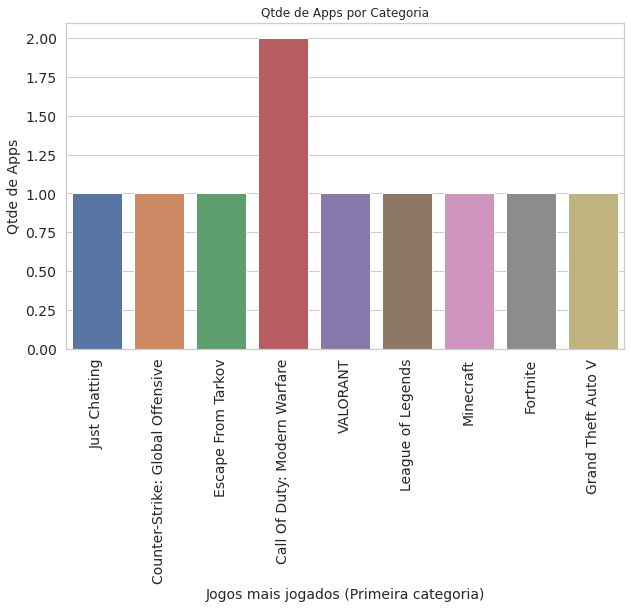

In [179]:
sns.countplot(data=df.head(10), x='firstCategory')
plt.xticks(rotation=90)
plt.xlabel('Jogos mais jogados (Primeira categoria)')
plt.ylabel('Qtde de Apps')
plt.title('Qtde de Apps por Categoria')
